In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from dataframe_builder import build_data_frame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

In [2]:
df_totals, df_aggregated  =build_data_frame(r"..\data_files")

In [3]:
#remove players with less than 50 games
df50 = df_aggregated[df_aggregated['G'] >=50].copy()

#select dtypes = numeric
df50_numeric = df50.select_dtypes('number').drop(columns=['Age', 'Year'])

In [4]:
df50_numeric.columns

Index(['G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [36]:
df50_numeric

,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,...,AST,STL,BLK,TOV,PF,PTS,Cluster,PC1,PC2,PC3
1,73,7,1659,182,424,155,363,27,61,22,...,108,37,7,40,157,541,7,-2.475120,-1.510125,1.590009
4,72,12,1401,248,533,101,259,147,274,42,...,73,42,12,42,87,639,1,-2.121620,-1.062940,-0.044330
6,50,50,1384,231,499,59,176,172,323,97,...,161,33,34,97,89,618,1,-1.000232,0.385733,-0.725637
7,75,75,2376,434,834,87,260,347,574,171,...,188,44,44,133,148,1126,8,2.394697,0.971050,-0.303783
8,68,68,2055,429,761,60,173,369,588,191,...,203,54,51,98,129,1109,8,2.373975,1.692307,-0.894718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243,53,5,728,110,196,17,65,93,131,40,...,18,17,23,31,105,277,6,-3.870784,0.685837,-0.766946
2244,57,4,608,70,141,17,52,53,89,27,...,23,25,38,14,62,184,6,-4.590273,0.378270,-0.861164
2245,62,31,1346,191,424,76,242,115,182,43,...,65,35,12,41,113,501,1,-2.710667,-0.823624,-0.012607
2247,63,45,1541,214,520,103,302,111,218,101,...,84,62,28,67,149,632,7,-0.923081,-0.162150,1.013370


In [19]:
# Step 1: Select relevant features
features = ['FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
X = df50_numeric[features]

# # Step 2: Normalize the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Step 3: Cluster
# kmeans = KMeans(n_clusters=3, random_state=42)
# df50_numeric['Cluster'] = kmeans.fit_predict(X_scaled)

# # Step 4 (Optional): Rename cluster labels manually after inspection
# # e.g., df_aggregated['Cluster_Label'] = df_aggregated['Cluster'].map({0: "Big", 1: "Wing", 2: "Point"})

In [32]:
# 1. Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# 3. KMeans on PCA components
kmeans = KMeans(n_clusters=9, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add clusters to DataFrame
df50_numeric['Cluster'] = clusters

# Now visualize with your 3D plot (e.g., Plotly or Matplotlib)


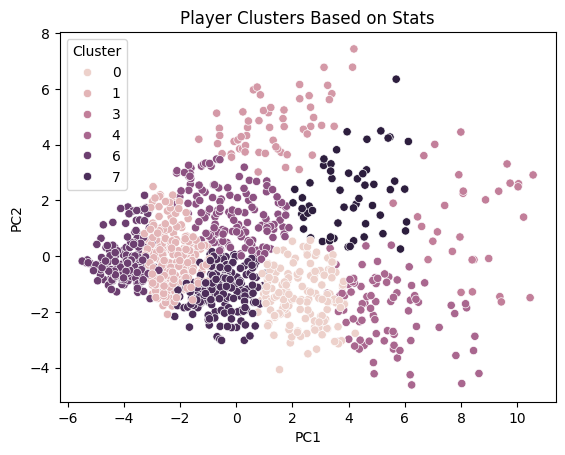

In [33]:
# Reduce to 2D for visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
df50_numeric['PC1'] = X_pca[:, 0]
df50_numeric['PC2'] = X_pca[:, 1]

# Scatter plot
sns.scatterplot(data=df50_numeric, x='PC1', y='PC2', hue='Cluster')
plt.title("Player Clusters Based on Stats")
plt.show()

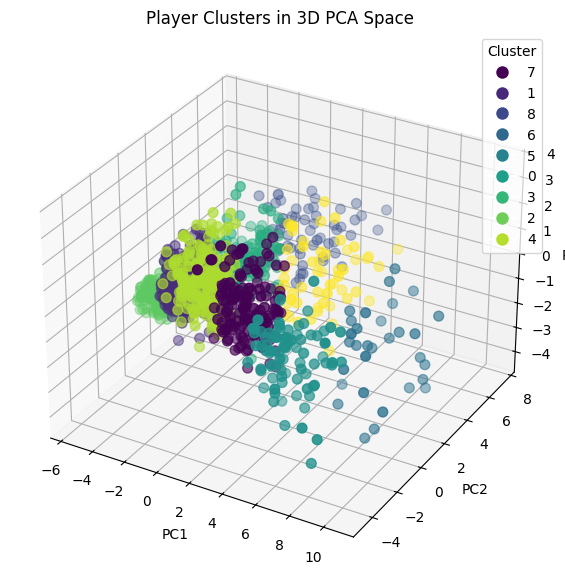

In [34]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Fit PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Add PC columns to DataFrame
df50_numeric['PC1'] = X_pca[:, 0]
df50_numeric['PC2'] = X_pca[:, 1]
df50_numeric['PC3'] = X_pca[:, 2]

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot using PC1, PC2, and PC3
scatter = ax.scatter(
    df50_numeric['PC1'],
    df50_numeric['PC2'],
    df50_numeric['PC3'],
    c=df50_numeric['Cluster'],
    cmap='viridis',
    s=50
)

ax.set_title("Player Clusters in 3D PCA Space")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

# Optional: create a legend
legend_labels = df50_numeric['Cluster'].unique()
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', label=label,
               markerfacecolor=plt.cm.viridis(i / len(legend_labels)), markersize=10)
    for i, label in enumerate(legend_labels)
]
ax.legend(handles=legend_handles, title="Cluster")

plt.show()


In [35]:
import plotly.express as px
import pandas as pd

# Assuming you've already done PCA and added PC1, PC2, PC3 to df50_numeric

fig = px.scatter_3d(
    df50_numeric,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Cluster',
    title="Interactive 3D PCA Player Clusters",
    opacity=0.7
)

fig.update_traces(marker=dict(size=5))
fig.show()


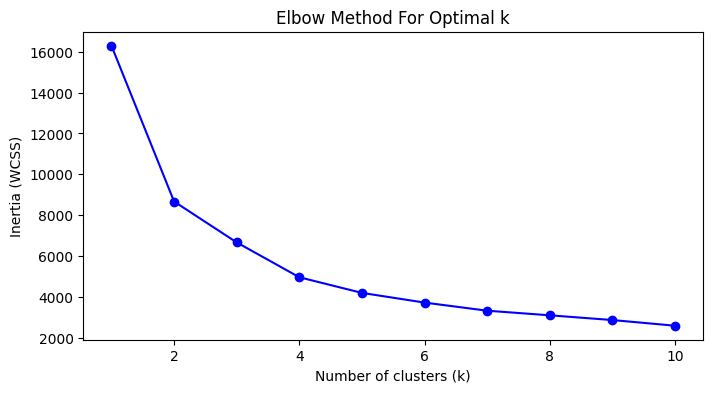

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.show()


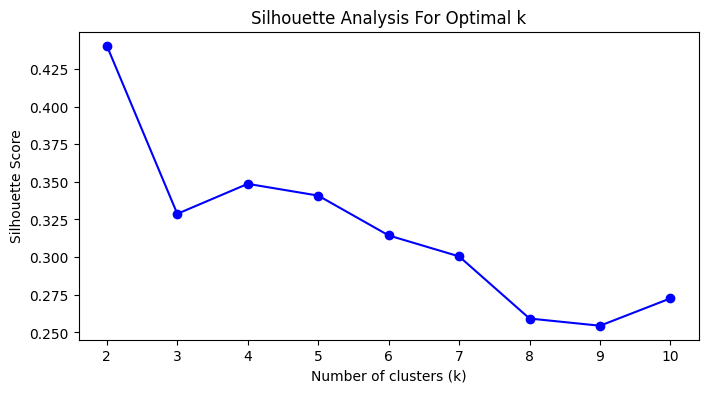

In [31]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):  # silhouette not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()


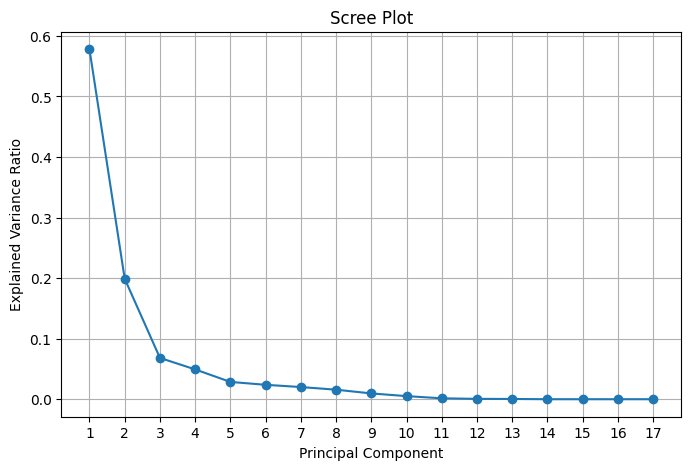

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Run PCA on your scaled data
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_,
         marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()


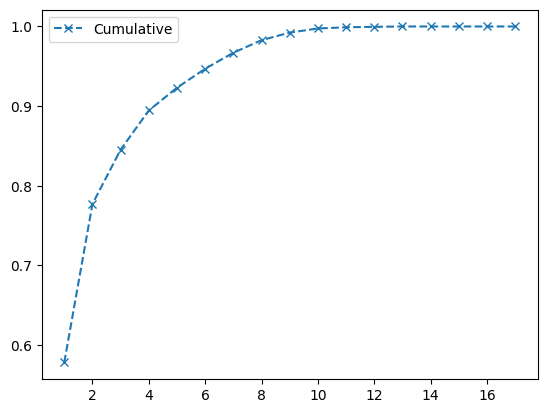

In [10]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_),
         marker='x', linestyle='--', label='Cumulative')
plt.legend()


In [11]:
# Create a DataFrame of loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=features
)

# View the first few components
loadings.round(3).iloc[:, :3]


,PC1,PC2,PC3
FG,0.308,-0.069,-0.023
FGA,0.297,-0.166,0.025
3P,0.148,-0.393,0.406
3PA,0.157,-0.395,0.382
2P,0.294,0.108,-0.222
2PA,0.298,0.045,-0.230
FT,0.280,-0.047,-0.303
FTA,0.283,0.005,-0.305
ORB,0.116,0.461,0.117
DRB,0.241,0.270,0.163


### There are 3 main principal components

The features that load onto the component in the same positive or negative direction correlate in the same manner.

PC 1 is primarily related to high usage players with high stats across points, rebounds, and assists, and turnovers.

PC 2 is primarily related to players with high rebounds and blocks statistics. This was previously explored in correlation heatmaps and is related to player height and player location

PC 3 is primarily related to players known as 3 and D. These players shoot a high volume of 3 point shots and play as a primary defender. They are able to maintain their place on the team fulfilling the spacing requirement of modern NBA on offense and defending the best players on defence. These players have high steals, blocks, and fouls to indicate their defensive presence.

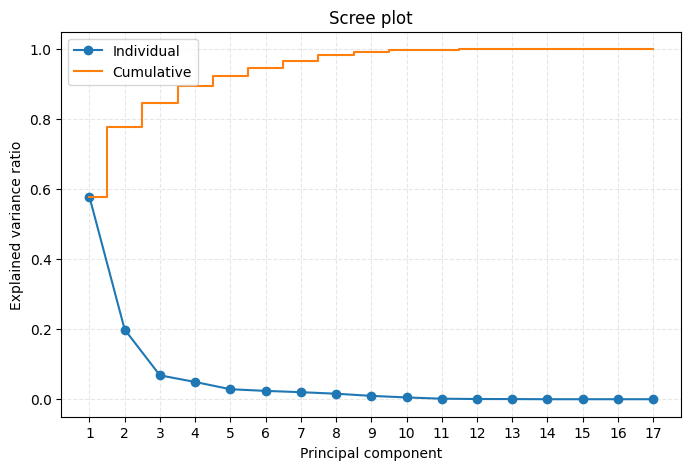

,PC1,PC2,PC3,PC4
FG,+0.308,-0.069,-0.023,-0.129
FGA,+0.297,-0.166,+0.025,-0.121
3P,+0.148,-0.393,+0.406,-0.259
3PA,+0.157,-0.395,+0.382,-0.237
2P,+0.294,+0.108,-0.222,-0.028
2PA,+0.298,+0.045,-0.230,-0.003
FT,+0.280,-0.047,-0.303,-0.118
FTA,+0.283,+0.005,-0.305,-0.110
ORB,+0.116,+0.461,+0.117,-0.031
DRB,+0.241,+0.270,+0.163,-0.112


Top |loadings| on PC1:
FG     0.308439
PTS    0.306452
2PA    0.298022
FGA    0.297269
2P     0.293581
TOV    0.284884
FTA    0.282861
FT     0.279925
DRB    0.240553
AST    0.235227
Name: PC1, dtype: float64


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ------------------------------------------------------------------
# 1. (Re)scale and fit PCA  – use all components so we can inspect them
# ------------------------------------------------------------------
features   = ['FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
X          = df50_numeric[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()                 # keep all components
pca.fit(X_scaled)

# ------------------------------------------------------------------
# 2. Scree plot – variance explained by each component
# ------------------------------------------------------------------
explained = pca.explained_variance_ratio_
cumu      = explained.cumsum()

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained)+1), explained, marker='o', label='Individual')
plt.step(np.arange(1, len(cumu)+1), cumu, where='mid', label='Cumulative')
plt.xlabel('Principal component')
plt.ylabel('Explained variance ratio')
plt.title('Scree plot')
plt.xticks(range(1, len(explained)+1))
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.show()

# ------------------------------------------------------------------
# 3. Loadings – feature weights on each PC
# ------------------------------------------------------------------
loadings = pd.DataFrame(
    pca.components_.T,                # transpose so rows = features
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=features
)

# Inspect the first few PCs – absolute value helps see strongest drivers
display(loadings.iloc[:, :4].style.format("{:+.3f}").background_gradient(cmap="PuBu"))

# Or, see top drivers for a specific PC (here PC1)
print("Top |loadings| on PC1:")
print(loadings['PC1'].apply(abs).sort_values(ascending=False).head(10)) #type:ignore
